<a href="https://colab.research.google.com/github/PGaea/ButardoPrincessGaea_BSIS2/blob/main/Activity3(Titanic_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [ ]:

#view the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# check for duplicate
df.duplicated().sum()

0

In [ ]:
# correct data types
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
# convert categorial data
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
df['Sex'].head()

,Sex
0,0
1,1
2,1
3,1
4,0


In [ ]:

# missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df['Age'] = pd.to_numeric(df['Age'])

In [ ]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [ ]:
#missing values
#filled with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
df['Age'].head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [ ]:

# remove outliers
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

In [ ]:
df['Age'].head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [ ]:

# create new features (FamilySize)
df['FamilySize'] = df['SibSp'] + df['Parch']

In [ ]:
df['FamilySize'].head()

,FamilySize
0,1
1,1
2,0
3,1
4,0


In [ ]:
# one-hot encoding - convert embarked
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,False,False,True


In [ ]:
# summary statistics
print(df[['Age', 'Fare']].describe())

              Age        Fare
count  891.000000  891.000000
mean    29.699118   32.204208
std     13.002015   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     29.699118   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200


In [ ]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Pclass', y='Survived', data =df)
plt.title('Survival Rate by Pclass')

NameError: name 'plt' is not defined

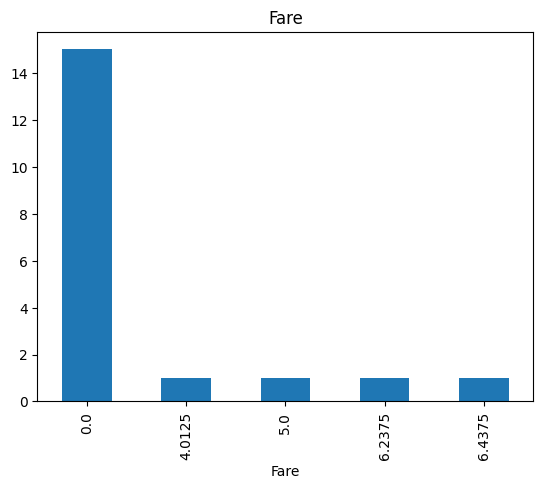

In [ ]:

plt.subplot(1, 2, 2)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')

In [ ]:
df_p = df.groupby(['Pclass']).size().head()

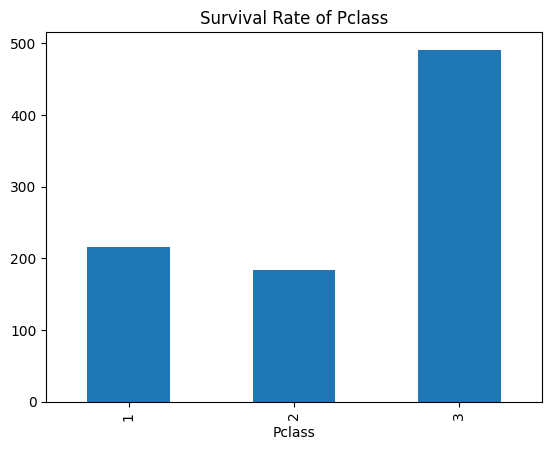

In [ ]:
df_p.plot(kind='bar')
plt.title('Survival Rate of Pclass')
plt.show()

In [ ]:
df_x = df.groupby(['Sex']).size().head()

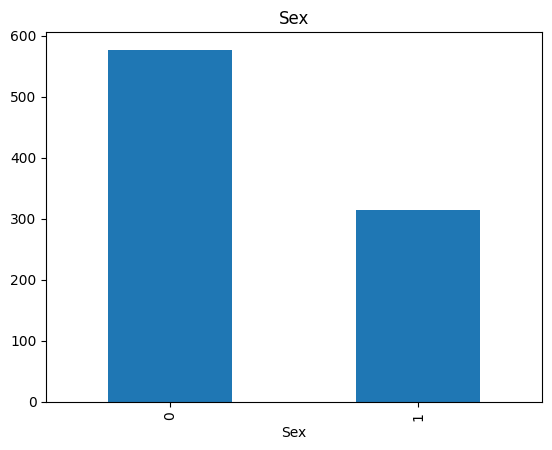

In [ ]:
df_x.plot(kind='bar')
plt.title('Sex')
plt.show()